In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Mean Squared Error (MSE): 24.291119474973566
R2 Score: 0.6687594935356314


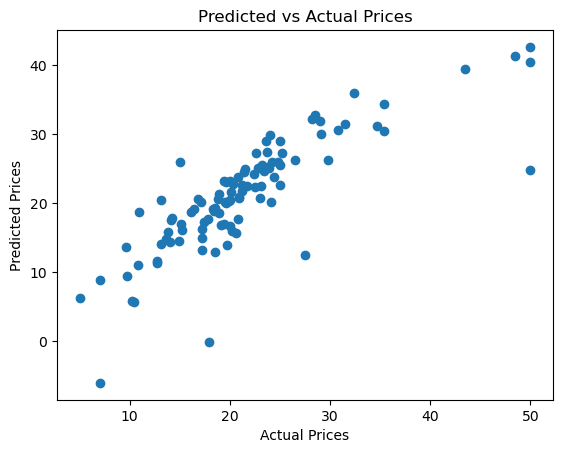

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

#combine the dataset into features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

#create the model
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

#predict target values for the test set
y_pred = model.predict(X_test)

#calculate MSE and R2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

#plot prediction vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

In [7]:
# Calculate training error
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", mse)

# Check if the model underfits or overfits
if train_mse > mse:
    print("The model is underfitting.")
elif train_mse < mse:
    print("The model is overfitting.")
else:
    print("The model is well-fitted.")


Training MSE: 21.641412753226312
Testing MSE: 24.291119474973566
The model is overfitting.


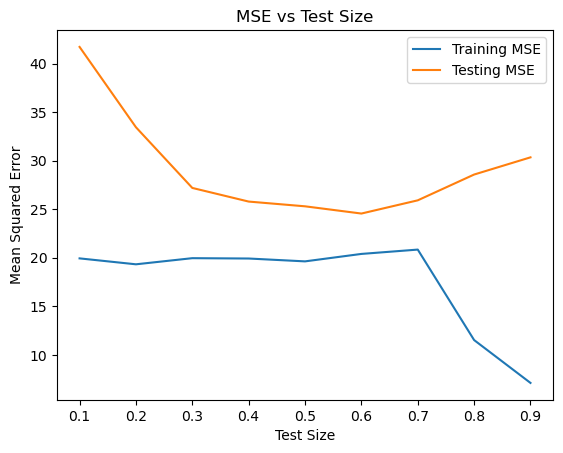

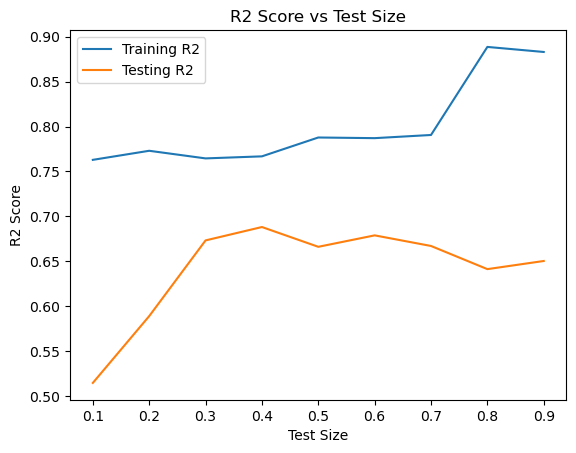

In [10]:
test_sizes = np.arange(0.1, 1.0, 0.1)
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

for size in test_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=size, random_state=0)

    # Train the model
    model.fit(X_train, y_train)

    # Predict and calculate metrics
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))
    train_r2_list.append(r2_score(y_train, y_train_pred))
    test_r2_list.append(r2_score(y_test, y_test_pred))

# Plot MSE
plt.plot(test_sizes, train_mse_list, label="Training MSE")
plt.plot(test_sizes, test_mse_list, label="Testing MSE")
plt.xlabel("Test Size")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Test Size")
plt.legend()
plt.show()

# Plot R2 Scores
plt.plot(test_sizes, train_r2_list, label="Training R2")
plt.plot(test_sizes, test_r2_list, label="Testing R2")
plt.xlabel("Test Size")
plt.ylabel("R2 Score")
plt.title("R2 Score vs Test Size")
plt.legend()
plt.show()

